In [2]:
import flopy as fp
import numpy as np
import geopandas as gp
import pandas as pd
import pickle
import os
import sys
from osgeo import ogr
from osgeo import gdal
from osgeo import gdal_array
from osgeo import osr
import matplotlib.pyplot as plt
from flopy.utils.gridgen import Gridgen 
from flopy.utils.gridintersect import GridIntersect
from flopy.utils import Raster
import shapely
from scipy.optimize import minimize
from shapely.geometry import Polygon, Point, LineString, MultiLineString, MultiPoint, MultiPolygon,shape
from shapely.strtree import STRtree  
import glob
import time



sys.path.insert(1, '../../Modeles2D/test_premier_model/')
# hand made functions
from Rouss1 import *
from Rouss2 import *

In [3]:
model_dir = "working"
model_name = "test_3D"
exe_name= "../../exe/mf6"

In [4]:
#geo parameters

MNT_path = "../../data/MNT/MNT_50.tif"
x0,y0,x1,y1 = get_MNTbbox(MNT_path)

Lx = x1-x0
Ly = y1-y0
nlay = 3
res = 300

ncol = int(Lx/res)
nrow = int(Ly/res)

delr = np.ones(ncol)*res
delc = np.ones(nrow)*res

idomain = np.zeros((nrow*ncol))

grid = fp.discretization.StructuredGrid(delc,delr,xoff=x0,yoff=y0) # create a grid identical to the dis package, will be used
                                                                   # to pre-process data

In [5]:
# load differents surfaces

folder_path = "../../data/txt_couches_nouv"
surfaces = []
for file in glob.glob(os.path.join(folder_path, '*.txt')):
    Rast = Raster.load(file)
    surfaces.append(Rast.resample_to_grid(grid.xcellcenters,
                                grid.ycellcenters,
                                band = Rast.bands[0],
                                method="nearest"))

top = surfaces[0]
Q = surfaces[1]
PC = surfaces[2]
PMS = surfaces[3]

In [6]:
def active_dom(surf,grid):
    
    """
    return a idomain for active zones, base on surfaces
    """
    idomainQ = np.zeros([grid.nrow,grid.ncol])
    idomainQ[surf != -9999] = 1
    return idomainQ


In [29]:
#domain
idomain = np.zeros([nlay,nrow,ncol])

for ilay in range(nlay):
    idomain[ilay] = active_dom(surfaces[ilay+1],grid)

In [36]:
#surfaces
botm = np.zeros([nlay,nrow,ncol])



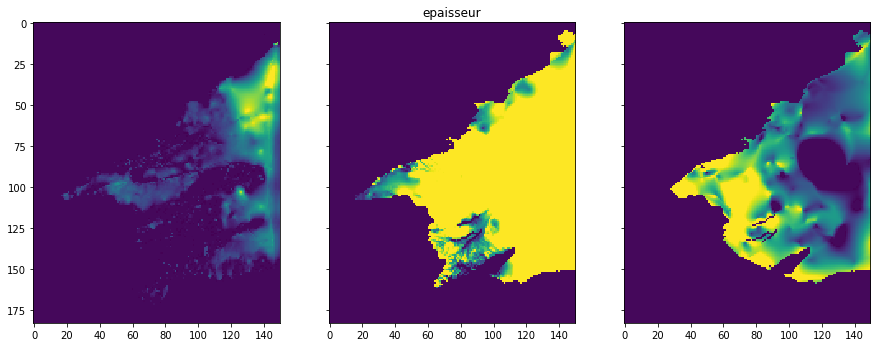

In [22]:
surf = [top,botm[0],botm[1],botm[2]]
fig,ax = plt.subplots(1,3,sharey=True,figsize=(15,10))
i=0;l=0
for s in np.arange(len(surf)-1):
    b=ax[i].imshow(surf[s]-surf[s+1])
    b.set_clim(0,50)
    ax[1].set_title("epaisseur")
    i +=1

